In [37]:
from sklearn import datasets
from sklearn import model_selection

data = datasets.load_digits()
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(data.data, data.target, test_size=0.15)

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

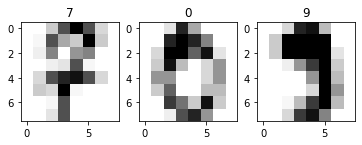

In [27]:
import matplotlib.pyplot as plt

samples = 3
fig, axes = plt.subplots(nrows=1, ncols=samples)

for i, ax in enumerate(axes):
    img = X_train[i].reshape((8,8))
    label = Y_train[i]
    ax.imshow(img, cmap="Greys")
    ax.set_title(label)

plt.show()

In [31]:
from sklearn import ensemble
import time

forest = ensemble.RandomForestClassifier()

# train
forest.fit(X_train, Y_train)

# benchmark
test_count = Y_test.size
ti = time.monotonic()
acc = forest.score(X_test, Y_test)
dt = time.monotonic() - ti

ms_per_sample = (dt / test_count) * 1000

print(f"Random Forest: {acc=} | {ms_per_sample=} | {params}")

Random Forest: acc=0.9777777777777777 | ms_per_sample=0.09725169985796567 | {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50, 50), activation="relu", learning_rate="adaptive", early_stopping=True, verbose=False)
mlp.fit(X_train, Y_train)

# benchmark
ti = time.monotonic()
acc = mlp.score(X_test, Y_test)
dt = time.monotonic() - ti

ms_per_sample = (dt / test_count) * 1000

print(f"MLP: {acc=} | {ms_per_sample=}")

MLP: acc=0.9481481481481482 | ms_per_sample=0.010750940742178096


In [30]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

# benchmark
ti = time.monotonic()
acc = tree.score(X_test, Y_test)
dt = time.monotonic() - ti

ms_per_sample = (dt / test_count) * 1000

print(f"Tree: {acc=} | {ms_per_sample=}")

Tree: acc=0.8592592592592593 | ms_per_sample=0.00940378134449323


In [33]:
# Save model
import pickle

with open("./forest.model", "wb") as fp:
    pickle.dump(forest, fp)

In [34]:
# make sure model is still working
with open("./forest.model", "rb") as fp:
    forest = pickle.load(fp)

forest.score(X_test, Y_test)

0.9777777777777777